In [1]:
from IPython.display import clear_output

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torch.utils.data import DataLoader

from datasets import ADTOF_load
from models import ADTOF_FrameRNN

## Load the dataset

In [2]:
dataloader = ADTOF_load("data/adtof/adtof_yt_train", shuffle=True, batch_size=32)

## Visualize a sample

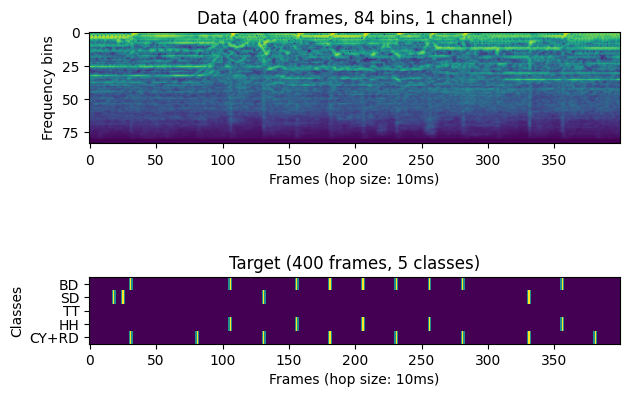

In [3]:
data, target = next(iter(dataloader))

fig, ax = plt.subplots(2)

ax[0].set_title("Data (400 frames, 84 bins, 1 channel)")
ax[0].imshow(data[0, :, :, 0].T)
ax[0].set_xlabel("Frames (hop size: 10ms)")
ax[0].set_ylabel("Frequency bins")

ax[1].set_title("Target (400 frames, 5 classes)")
ax[1].imshow(target[0].T, aspect=10, interpolation="nearest")
ax[1].set_xlabel("Frames (hop size: 10ms)")
ax[1].set_ylabel("Classes")
ax[1].set_yticks([0, 1, 2, 3, 4], ("BD", "SD", "TT", "HH", "CY+RD"))
fig.tight_layout()
plt.show()

## Train a model

In [4]:
model = ADTOF_FrameRNN()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.BCELoss()

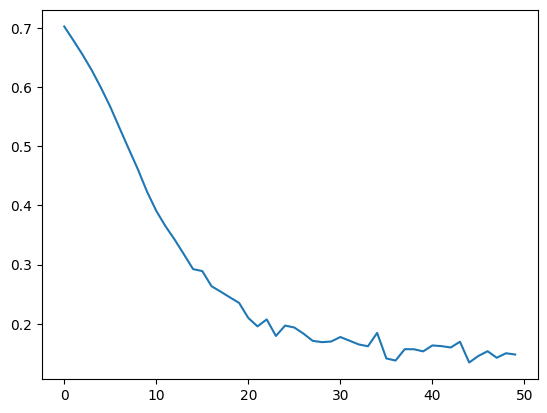

In [5]:
ITERATIONS = 50

losses = []

model.train()
iterator = iter(dataloader)
for _ in range(ITERATIONS):
    X, y_true = next(iterator)

    y_pred = model(X.permute(0, 3, 1, 2))

    loss = loss_fn(y_pred, y_true).mean()
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    losses.append(loss.item())
    clear_output(wait=True)
    plt.plot(np.arange(len(losses)), np.array(losses))
    plt.show()